In [1]:
import pandas as pd
import numpy as np
df_train_median = pd.read_csv('alinefinal_height_median (no anomaly).csv')

#check if there is any missing value
df_train_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            2261 non-null   int64  
 1   hadm_id               2261 non-null   int64  
 2   icustay_id            2261 non-null   int64  
 3   age                   2261 non-null   float64
 4   gender                2261 non-null   object 
 5   day_icu_intime        2261 non-null   object 
 6   hour_icu_intime       2261 non-null   int64  
 7   OUTCOME_icu_exp_flag  2261 non-null   int64  
 8   OUTCOME_day_28_flag   2261 non-null   int64  
 9   aline_flag            2261 non-null   int64  
 10  aline_time_day        2261 non-null   float64
 11  weight_first          2261 non-null   float64
 12  height_first          2261 non-null   float64
 13  bmi                   2261 non-null   float64
 14  service_unit          2261 non-null   object 
 15  sofa_first           

In [2]:
#Check numerical data columns
print('There are %s numerical columns.'%(str(len(df_train_median.select_dtypes(include=['int64']).columns))))
df_train_median.select_dtypes(include=['int64']).columns

There are 31 numerical columns.


Index(['subject_id', 'hadm_id', 'icustay_id', 'hour_icu_intime',
       'OUTCOME_icu_exp_flag', 'OUTCOME_day_28_flag', 'aline_flag',
       'sofa_first', 'hr_first', 'spo2_first', 'bun_first', 'chloride_first',
       'platelet_first', 'sodium_first', 'tco2_first', 'chf_flag', 'afib_flag',
       'renal_flag', 'liver_flag', 'copd_flag', 'cad_flag', 'stroke_flag',
       'malignancy_flag', 'respfail_flag', 'endocarditis_flag', 'ards_flag',
       'pneumonia_flag', 'sedative_flag', 'midazolam_flag', 'fentanyl_flag',
       'propofol_flag'],
      dtype='object')

In [3]:
#Check numerical data columns
print('There are %s numerical columns.'%(str(len(df_train_median.select_dtypes(include=['float64']).columns))))
df_train_median.select_dtypes(include=['float64']).columns

There are 11 numerical columns.


Index(['age', 'aline_time_day', 'weight_first', 'height_first', 'bmi',
       'map_first', 'temp_first', 'creatinine_first', 'hgb_first',
       'potassium_first', 'wbc_first'],
      dtype='object')

In [4]:
#check categorical data columns 
print('There are %s categorical columns.'%(str(len(df_train_median.select_dtypes(include=['object']).columns))))
df_train_median.select_dtypes(include=['object']).columns

There are 3 categorical columns.


Index(['gender', 'day_icu_intime', 'service_unit'], dtype='object')

In [5]:
id_col = 'subject_id'

target_col = 'OUTCOME_icu_exp_flag'
second_target_col = 'OUTCOME_day_28_flag'

#33 numerical columns
numerical_cols = ['sofa_first', 'hr_first', 'spo2_first', 'bun_first', 'chloride_first',
       'platelet_first', 'sodium_first', 'tco2_first', 'chf_flag', 'afib_flag',
       'renal_flag', 'liver_flag', 'copd_flag', 'cad_flag', 'stroke_flag',
       'malignancy_flag', 'respfail_flag', 'endocarditis_flag', 'ards_flag',
       'pneumonia_flag', 'sedative_flag', 'midazolam_flag', 'fentanyl_flag',
       'propofol_flag','age', 'aline_time_day', 'bmi',
       'map_first', 'temp_first', 'creatinine_first', 'hgb_first',
       'potassium_first', 'wbc_first']

#2 categorical columns
categorical_cols = ['gender', 'service_unit']

In [6]:
# combine the functions above
# check categorical columns
def explore_categorical_columns(df,categorical_cols):
    nunique_values = []
    na_values = []
    for col in categorical_cols:
        nunique_values.append(df[col].nunique())
        na_values.append(len(df.loc[df[col].isna()]))
    df_stats_categorical = pd.DataFrame(list(zip(categorical_cols,nunique_values,na_values)),columns=['Column_Name','#Unique_Values','#Null_Value'])
    df_null = df_stats_categorical[df_stats_categorical['#Null_Value']>0]
    df_unique_value = df_stats_categorical[df_stats_categorical['#Unique_Values'] == 1]
    if len(df_null) > 0:
        print('Columns with Null value: %s'%(str(df_null['Column_Name'])))
    else:
        print('There is no Null values in the categorical columns')
    if len(df_unique_value) > 0:
        print('Columns with only 1 unique value: %s'%(str(list(df_unique_value['Column_Name']))))
    else:
        print('All categorical columns have more than 1 value.')
        
#check numerical columns
def explore_numerical_columns(df,numerical_cols):
    na_values = []
    for col in numerical_cols:
        na_values.append(len(df.loc[df[col].isna()]))
    df_stats_numerical = pd.DataFrame(list(zip(numerical_cols,na_values)),columns=['Column_Name','#Null_Value'])
    df_null = df_stats_numerical[df_stats_numerical['#Null_Value']>0]
    df_stats = df[numerical_cols].describe().T
    df_unique_value = df_stats[df_stats['std']==0]
    
    if len(df_null) > 0:
        print('Columns with Null value: %s'%(str(df_null['Column_Name'])))
    else:
        print('There is no Null values in the numerical columns')
    
    if len(df_unique_value) > 0:
        print('Columns with only 1 unique value: %s'%(str(list(df_unique_value.index))))
    else:
        print('All numerical columns have more than 1 value. \n')

#check categorical columns
print('Categorical_Columns'.center(50,"*"))
explore_categorical_columns(df_train_median,categorical_cols)
print('Numerical_Columns'.center(50,"*"))
#check numerical columns
explore_numerical_columns(df_train_median,numerical_cols)

# Can drop endocarditis_flag since it contains 1 unique value

***************Categorical_Columns****************
There is no Null values in the categorical columns
All categorical columns have more than 1 value.
****************Numerical_Columns*****************
There is no Null values in the numerical columns
Columns with only 1 unique value: ['endocarditis_flag']


In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def process_numerical_data(df,numerical_cols,drop_numerical_columns):
    sacalar = StandardScaler()
    # sacalar = MinMaxScaler() if using MinMaxScaler
    scale_numerical_cols = list(set(numerical_cols)-set(drop_numerical_columns))
    df_numerical = sacalar.fit_transform(df[scale_numerical_cols])
    df_numerical = pd.DataFrame(df_numerical,columns=scale_numerical_cols)
    return df_numerical

# drop numericals columns with unique labels that you want to drop
drop_numerical_columns = ['endocarditis_flag']
df_train_numerical = process_numerical_data(df_train_median,numerical_cols,drop_numerical_columns)
df_train_numerical

,sodium_first,sofa_first,midazolam_flag,spo2_first,copd_flag,map_first,pneumonia_flag,sedative_flag,potassium_first,bun_first,...,aline_time_day,chloride_first,age,temp_first,ards_flag,platelet_first,tco2_first,liver_flag,wbc_first,fentanyl_flag
0,0.718453,-0.690497,-0.157899,0.446539,-0.12356,-0.145401,2.183542,-0.534902,1.831504,0.700322,...,-0.279588,0.147219,1.419537,-1.394117,-0.132483,-0.171923,0.182383,-0.254956,-0.121417,-0.209427
1,0.513711,-0.192820,-0.157899,0.446539,-0.12356,-0.560769,-0.457971,1.869500,-0.821963,0.022485,...,-0.150409,0.484978,0.283167,-1.148327,-0.132483,-0.290791,-0.597140,-0.254956,-0.893593,-0.209427
2,0.104227,3.788601,-0.157899,0.446539,-0.12356,-0.787335,2.183542,1.869500,1.831504,0.700322,...,0.592372,0.991617,0.740496,-1.517010,-0.132483,-1.528996,-1.181782,3.922252,-0.620114,-0.209427
3,-0.919482,-0.192820,-0.157899,-0.221202,-0.12356,0.402135,-0.457971,-0.534902,0.209941,-0.723137,...,-0.279588,-0.021661,0.360931,-0.410957,-0.132483,-0.429470,-0.792021,3.922252,-1.231420,-0.209427
4,-0.919482,1.300213,6.333174,0.446539,-0.12356,-0.220921,-0.457971,1.869500,-0.379719,0.158052,...,2.532644,-0.190540,-0.702602,-1.271222,-0.132483,-1.439846,0.182383,3.922252,-0.089243,4.774935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,-0.509998,-0.192820,-0.157899,-1.556686,-0.12356,0.345494,-0.457971,1.869500,-0.821963,-0.316434,...,0.262965,-0.359420,1.712307,-1.332669,-0.132483,-0.776167,0.767025,-0.254956,0.168149,-0.209427
2257,-2.147933,-1.188175,-0.157899,0.446539,-0.12356,0.345494,-0.457971,-0.534902,0.652185,0.429187,...,-0.277005,-1.710457,0.081648,-0.533852,-0.132483,1.244585,0.767025,-0.254956,0.473802,-0.209427
2258,0.513711,-0.192820,-0.157899,0.446539,-0.12356,-2.090088,-0.457971,-0.534902,0.357356,-0.519785,...,-0.278296,0.991617,-1.672730,0.264966,-0.132483,0.194586,-0.986901,-0.254956,1.406848,-0.209427
2259,-0.305256,1.300213,-0.157899,0.446539,-0.12356,0.628701,-0.457971,-0.534902,-0.232304,0.158052,...,-0.279588,-0.866059,1.230831,-0.288060,-0.132483,-0.706828,0.572144,-0.254956,-0.298374,-0.209427


In [8]:
def process_categorical_data(df,categorical_cols,drop_categorical_columns):
    df_categorical = pd.get_dummies(df[[var for var in categorical_cols if var not in drop_categorical_columns]], drop_first = True)
    return df_categorical

drop_categorical_columns = []
df_train_categorical = process_categorical_data(df_train_median, categorical_cols, drop_categorical_columns)
df_train_categorical

,gender_M,service_unit_ENT,service_unit_GU,service_unit_GYN,service_unit_MED,service_unit_NMED,service_unit_NSURG,service_unit_OBS,service_unit_OMED,service_unit_ORTHO,service_unit_PSURG,service_unit_SURG,service_unit_TRAUM
0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,0,0,0,0,0,0,0,0,0,0,0,0,1
2257,0,0,0,0,0,0,1,0,0,0,0,0,0
2258,1,0,0,0,0,0,0,0,0,0,0,0,1
2259,1,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
df_train_features = pd.concat([df_train_numerical, df_train_categorical],axis=1)
df_train_features.shape

# extra category: service_unit_OBS from aline no bmi

(2261, 45)

# Random Forest (Outcome_exp)

In [10]:
# Check target variable
df_train_median[target_col].unique()

array([1, 0], dtype=int64)

In [11]:
# Check class imbalance
df_train_median[target_col].value_counts()

0    2071
1     190
Name: OUTCOME_icu_exp_flag, dtype: int64

In [12]:
# split the data into train and test
from sklearn.model_selection import train_test_split
df_train_labels = df_train_median[target_col]
train_x, test_x, train_y, test_y = train_test_split(df_train_features,df_train_labels,test_size=0.25,random_state=1)

In [13]:
# Baseline RFC with class weights (No PCA)

from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()
rfc_base = RandomForestClassifier(class_weight = {0:0.084, 1:0.916}) # 2071 0s and 190 1s
rfc_base.fit(train_x, train_y)

In [ ]:
y_true_base, y_pred_base = test_y , rfc_base.predict(test_x)

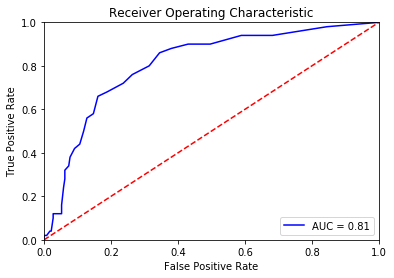

In [14]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc_base.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true_base, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
# RFC - Randomised Tuning (no PCA)

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

rfc_base_rdm = RandomForestClassifier(class_weight = {0:0.084, 1:0.916})
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs_base_rdm = RandomizedSearchCV(rfc_base_rdm, param_dist, n_iter = 100, cv = 5, verbose = 1, n_jobs=-1, random_state=0)

rs_base_rdm.fit(train_x, train_y)
rs_base_rdm.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}

In [16]:
rs_base_df = pd.DataFrame(rs_base_rdm.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_base_df = rs_base_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

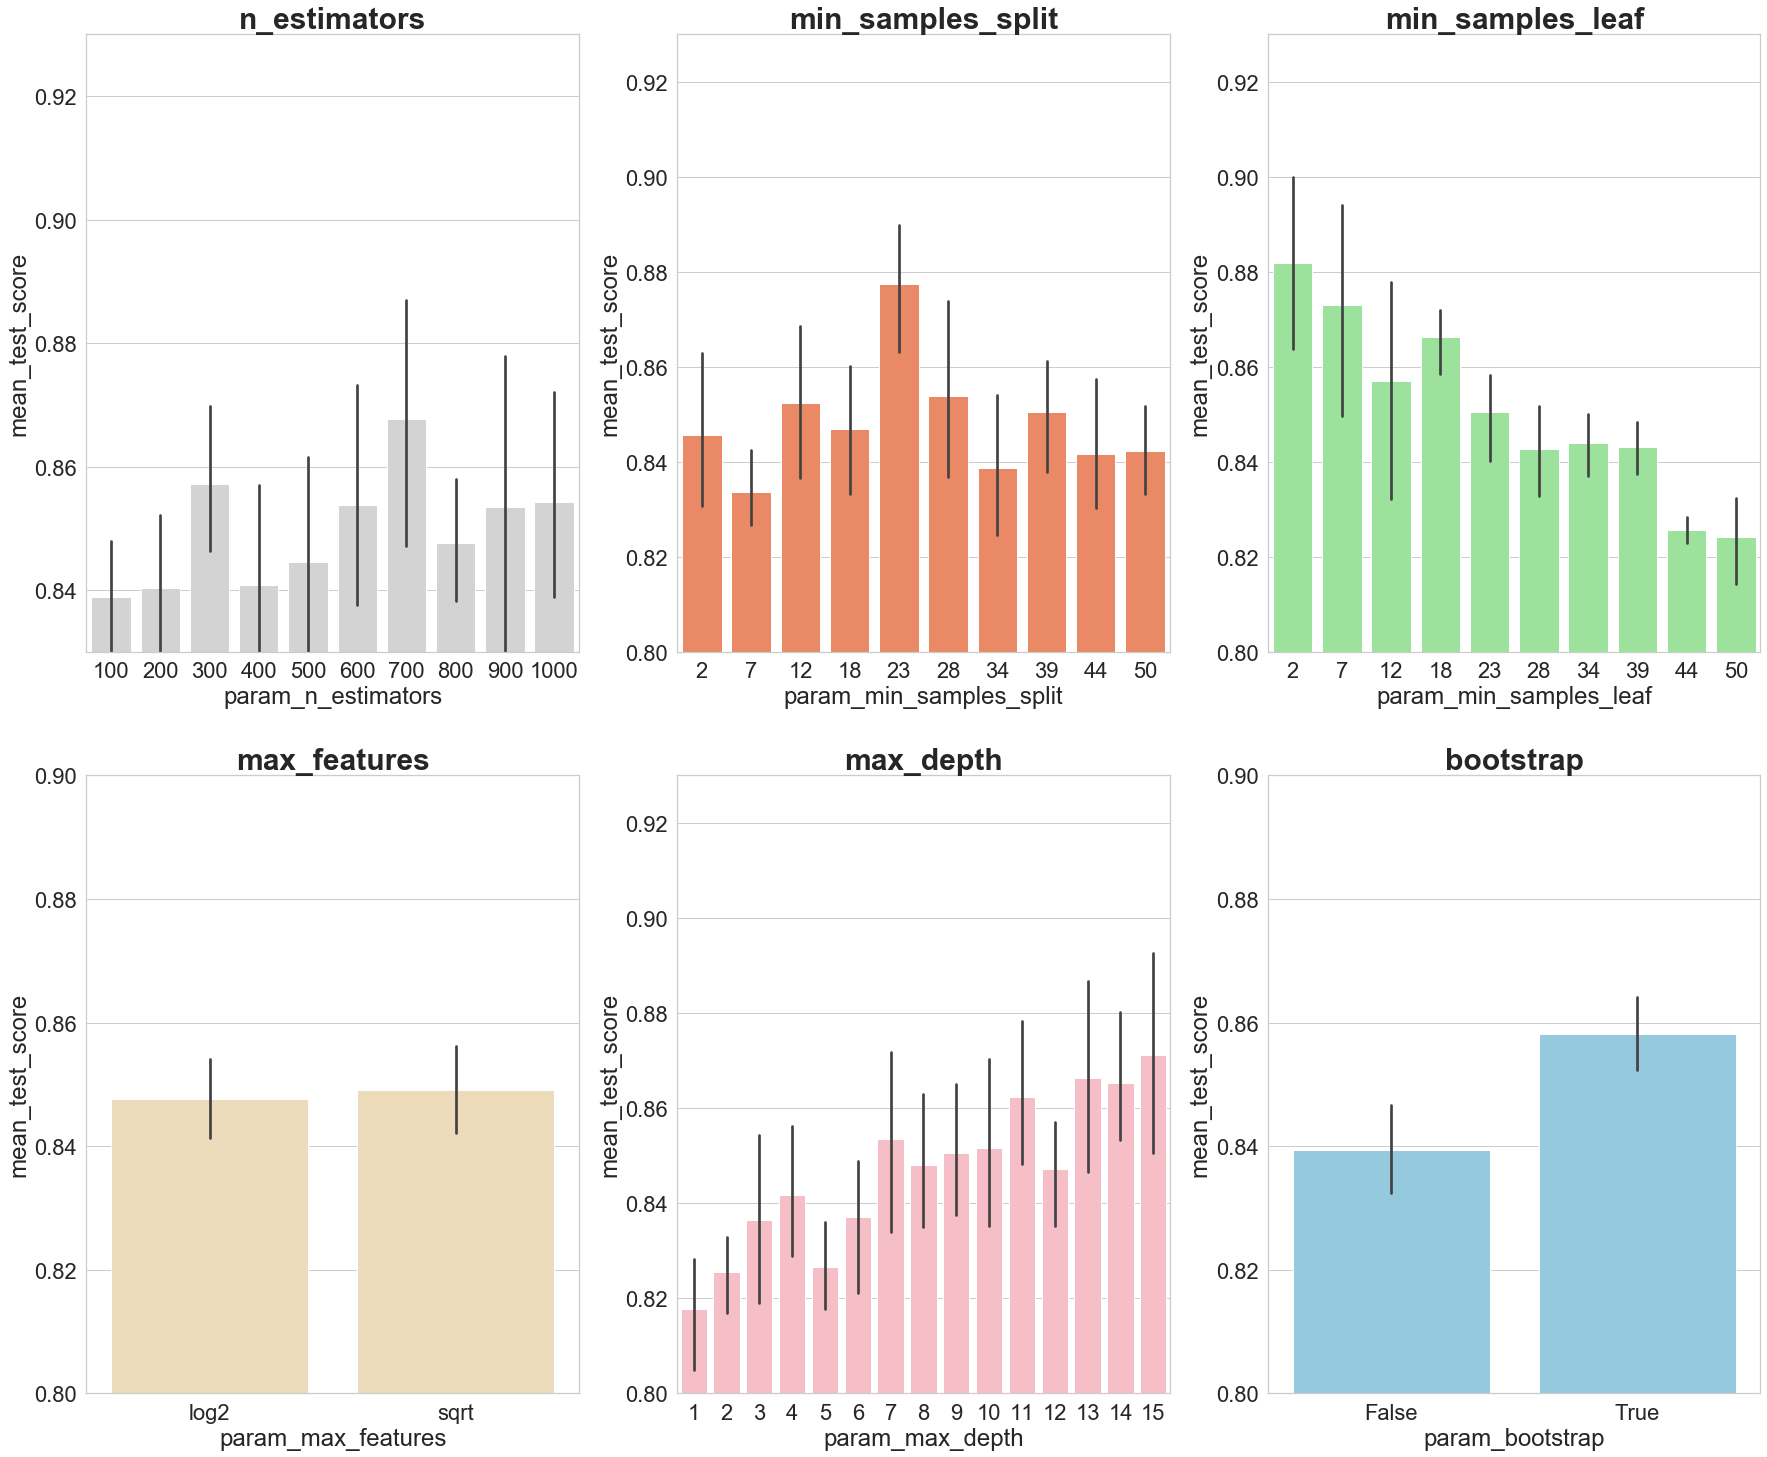

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_base_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93]),axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_base_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.80,.93]),axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_base_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.93]),axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_base_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.80,.90]),axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_base_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.93]),axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_base_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.80,.90])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [18]:
# RFC - GridSearch Tuning (no PCA)

from sklearn.model_selection import GridSearchCV

n_estimators = [700]
max_features = ['log2','sqrt']
max_depth = [13,14,15]
min_samples_split = [22,23,24]
min_samples_leaf = [2,3,4]
bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc_base_gs = GridSearchCV(rfc_base_rdm, param_grid, cv = 5, verbose = 1, n_jobs=-1)
rfc_base_gs.fit(train_x, train_y)
rfc_base_gs.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  3.6min finished


In [22]:
y_true_base_gs, y_pred_base_gs = test_y, rfc_base_gs.best_estimator_.predict(test_x)

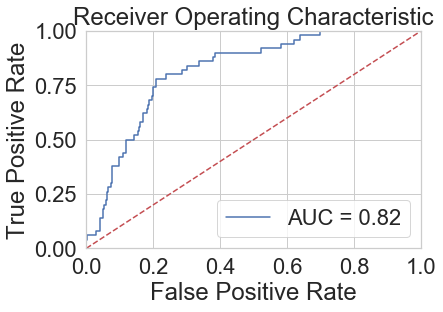

In [24]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc_base_gs.best_estimator_.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true_base_gs, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
# feature importance

# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.

# Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as 
# the sum over the number of splits (across all tress) that include the feature, 
# proportionally to the number of samples it splits.

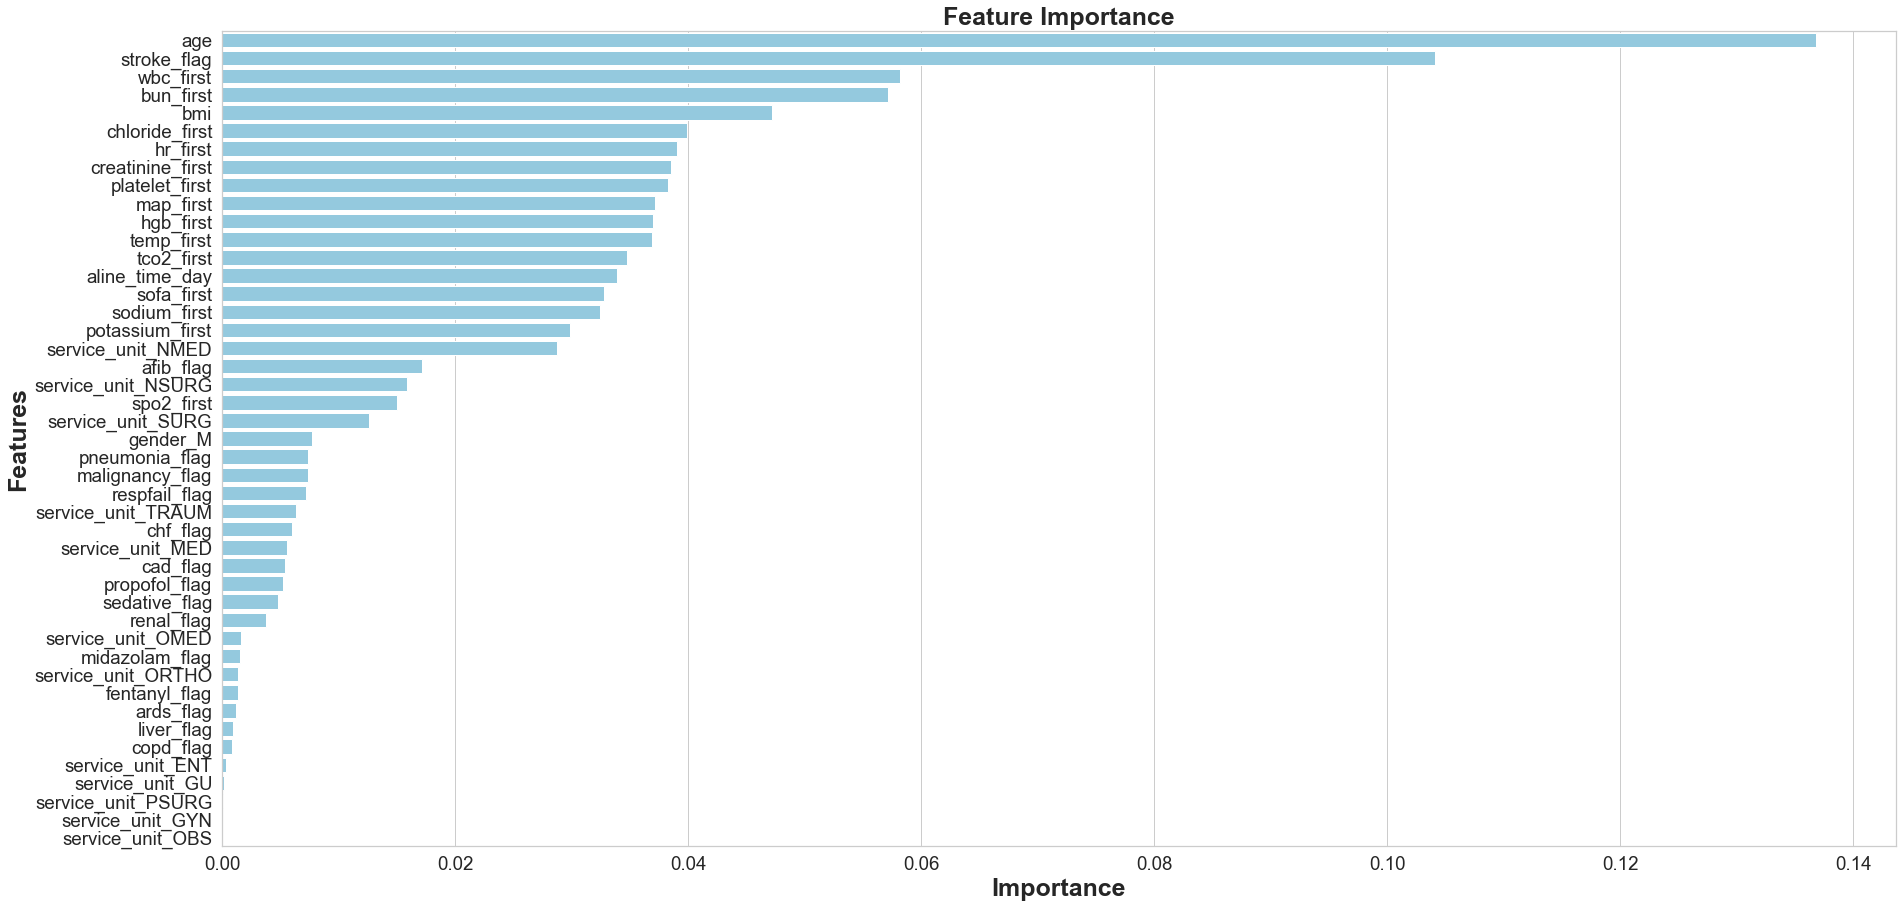

None

,Features,Gini-Importance
0,age,0.136804
1,stroke_flag,0.104061
2,wbc_first,0.058170
3,bun_first,0.057113
4,bmi,0.047234
5,chloride_first,0.039942
6,hr_first,0.039038
7,creatinine_first,0.038528
8,platelet_first,0.038257
9,map_first,0.037177


In [27]:
feats = {}
for feature, importance in zip(df_train_features.columns, rfc_base.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

In [29]:
# checking for components/dimensions to cover 95% variance

explained_variance = pca.explained_variance_ratio_

def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

# Run function
select_n_components(explained_variance, 0.95)

28

In [30]:
# sanity check

import numpy as np
arr = np.array(explained_variance).tolist()
count = 0
for i in arr[0:select_n_components(explained_variance, 0.95)]:
    count += i
print (count)

print(explained_variance.size)

0.9500963495613172
45


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=select_n_components(explained_variance, 0.95))
pca.fit(train_x)

train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [32]:
# Baseline RFC with class weights (PCA)

from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()
rfc_base_pca = RandomForestClassifier(class_weight = {0:0.084, 1:0.916}) # 2071 0s and 190 1s
rfc_base_pca.fit(train_x_pca, train_y)

y_true_pca, y_pred_pca = test_y , rfc_base_pca.predict(test_x_pca)

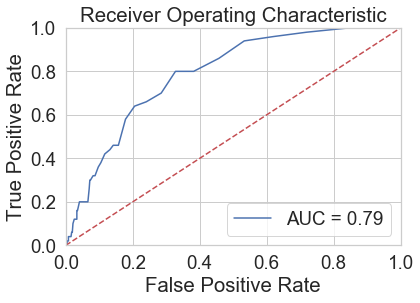

In [34]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc_base_pca.predict_proba(test_x_pca)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true_pca, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
# RFC - Randomised Tuning (PCA)

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

rfc_pca_rdm = RandomForestClassifier(class_weight = {0:0.084, 1:0.916})
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs_pca = RandomizedSearchCV(rfc_pca_rdm, param_dist, n_iter = 100, cv = 5, verbose = 1, n_jobs=-1, random_state=0)

rs_pca.fit(train_x_pca, train_y)
rs_pca.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.7min finished


{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}

In [36]:
rs_pca_df = pd.DataFrame(rs_pca.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_pca_df = rs_pca_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

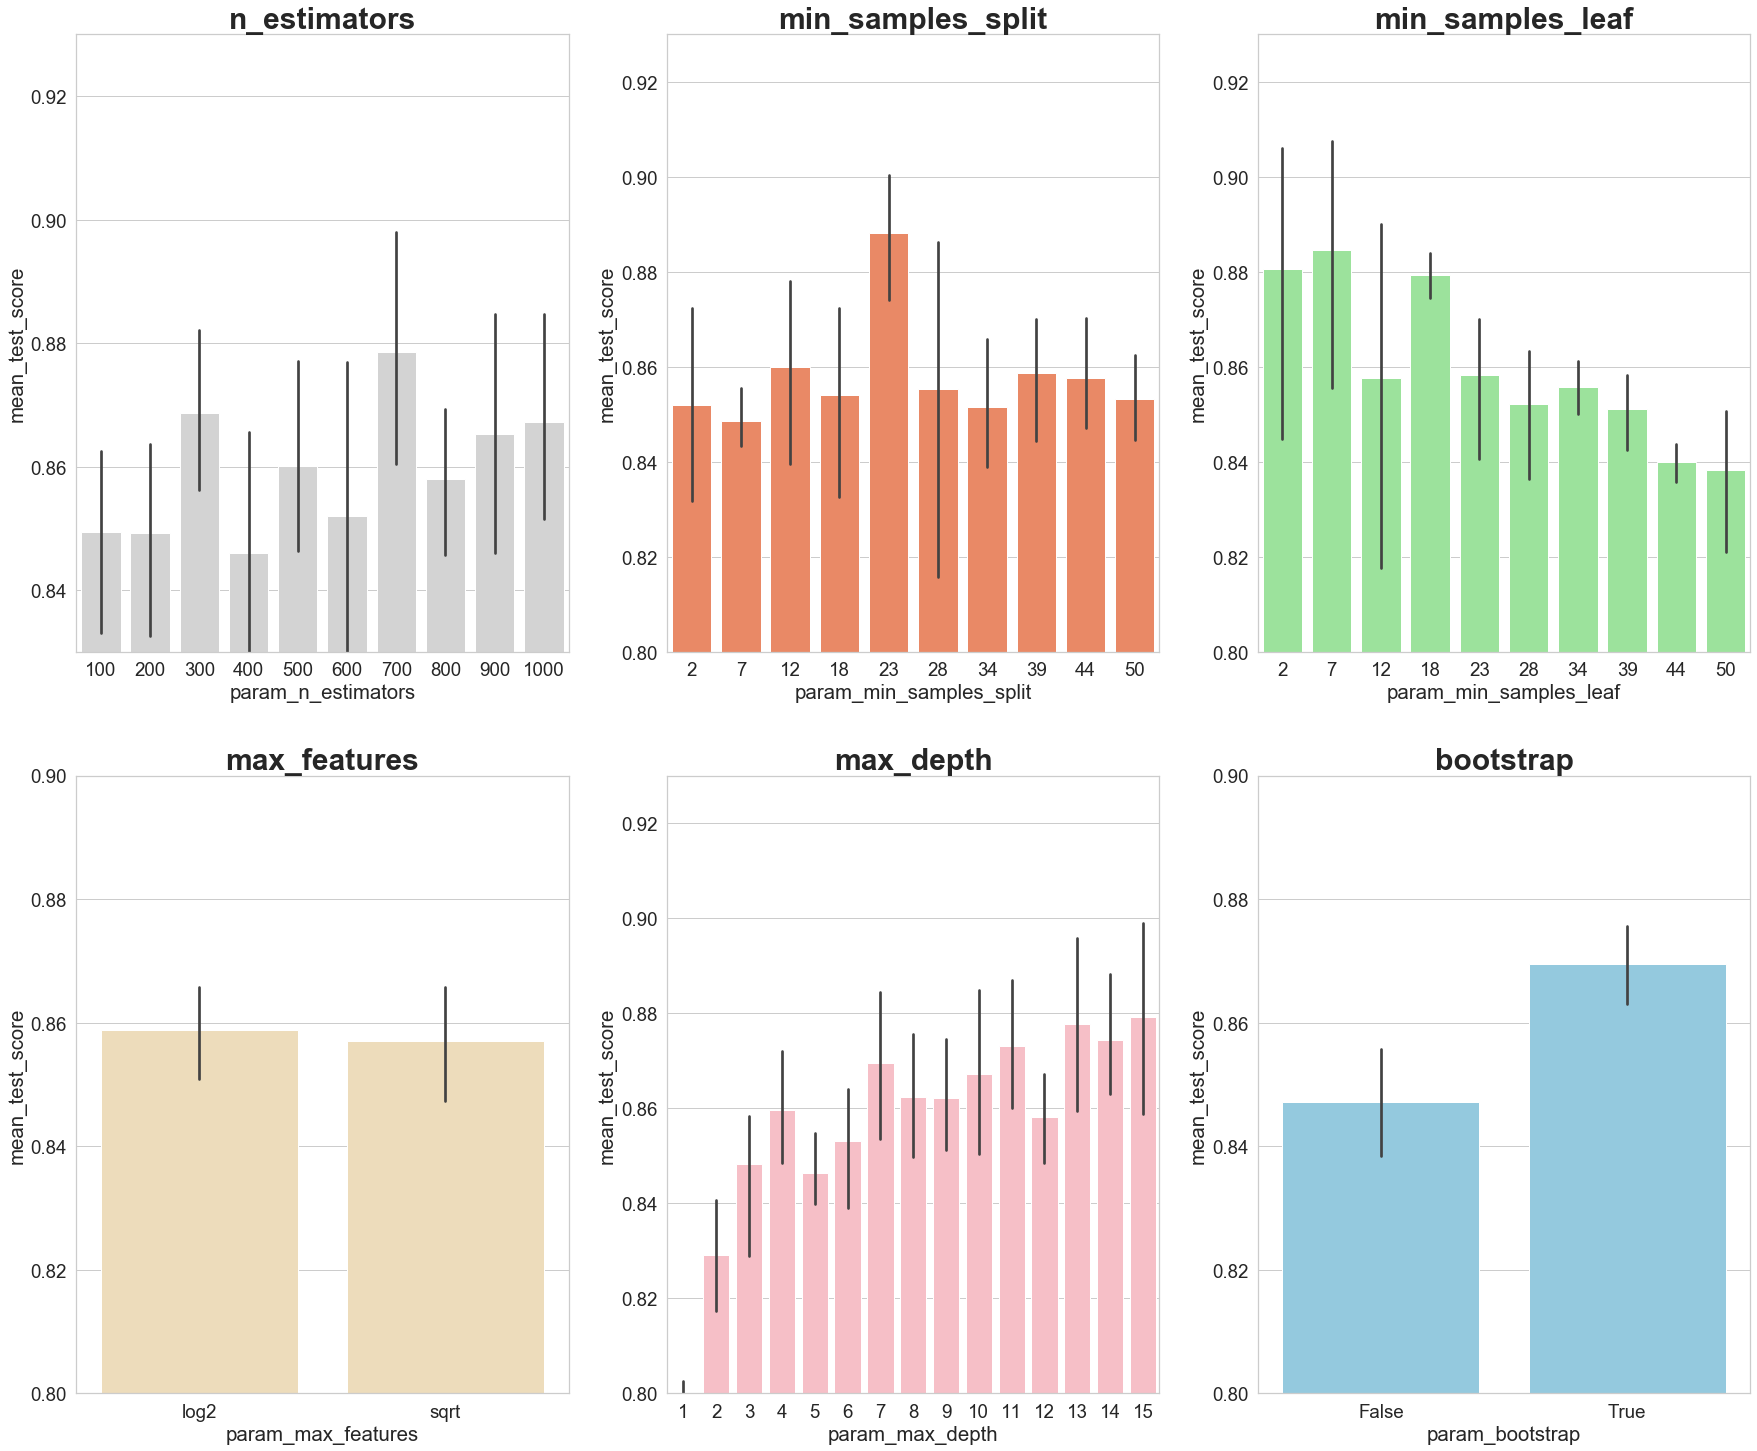

In [37]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_pca_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93]),axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_pca_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.80,.93]),axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_pca_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.93]),axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_pca_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.80,.90]),axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_pca_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.93]),axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_pca_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.80,.90])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

n_estimators = [700]
max_features = ['log2']
max_depth = [13,14,15]
min_samples_split = [22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc_pca_gs = GridSearchCV(rfc_pca_rdm, param_grid, cv = 5, verbose = 1, n_jobs=-1)

rfc_pca_gs.fit(train_x_pca, train_y)
rfc_pca_gs.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  5.3min finished


{'bootstrap': True,
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 23,
 'n_estimators': 700}

In [40]:
y_true_pca_gs, y_pred_pca_gs = test_y, rfc_pca_gs.best_estimator_.predict(test_x_pca)

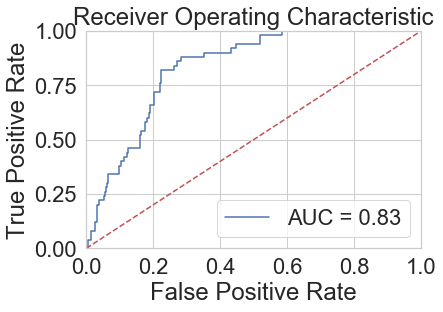

In [53]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc_pca_gs.best_estimator_.predict_proba(test_x_pca)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true_pca_gs, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# precision = true positive/(true positive + false positive)
# recall = true positive/(true positive + false negative)
# f1 score = 2 * (precision * recall)/(precision + recall)

conf_matrix_base = pd.DataFrame(confusion_matrix(y_true_base, y_pred_base), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_base_gs = pd.DataFrame(confusion_matrix(y_true_base_gs, y_pred_base_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_pca = pd.DataFrame(confusion_matrix(y_true_pca, y_pred_pca), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_pca_gs = pd.DataFrame(confusion_matrix(y_true_pca_gs, y_pred_pca_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_base)
display('Baseline RFC score', accuracy_score(y_true_base, y_pred_base))
print('Classification Report:') 
print(classification_report(y_true_base, y_pred_base))
display(conf_matrix_base_gs)
display('Tuned RFC score', accuracy_score(y_true_base_gs, y_pred_base_gs))
print('Classification Report:') 
print(classification_report(y_true_base_gs, y_pred_base_gs))
display(conf_matrix_pca)
display('Baseline PCA RFC score', accuracy_score(y_true_pca, y_pred_pca))
print('Classification Report:') 
print(classification_report(y_true_pca, y_pred_pca))
display(conf_matrix_pca_gs)
display('Tuned PCA RFC score', accuracy_score(y_true_pca_gs, y_pred_pca_gs))
print('Classification Report:') 
print(classification_report(y_true_pca_gs, y_pred_pca_gs))

,predicted 0,predicted 1
actual 0,516,0
actual 1,49,1


'Baseline RFC score'

0.9134275618374559

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       516
           1       1.00      0.02      0.04        50

    accuracy                           0.91       566
   macro avg       0.96      0.51      0.50       566
weighted avg       0.92      0.91      0.87       566



,predicted 0,predicted 1
actual 0,486,30
actual 1,40,10


'Tuned RFC score'

0.8763250883392226

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       516
           1       0.25      0.20      0.22        50

    accuracy                           0.88       566
   macro avg       0.59      0.57      0.58       566
weighted avg       0.86      0.88      0.87       566



,predicted 0,predicted 1
actual 0,514,2
actual 1,49,1


'Baseline PCA RFC score'

0.9098939929328622

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       516
           1       0.33      0.02      0.04        50

    accuracy                           0.91       566
   macro avg       0.62      0.51      0.50       566
weighted avg       0.86      0.91      0.87       566



,predicted 0,predicted 1
actual 0,500,16
actual 1,40,10


'Tuned PCA RFC score'

0.901060070671378

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       516
           1       0.38      0.20      0.26        50

    accuracy                           0.90       566
   macro avg       0.66      0.58      0.61       566
weighted avg       0.88      0.90      0.89       566



# Random Forest (Outcome_28)

In [54]:
# Check target variable
df_train_median[second_target_col].unique()

array([1, 0], dtype=int64)

In [55]:
# Check class imbalance
df_train_median[second_target_col].value_counts()

0    1937
1     324
Name: OUTCOME_day_28_flag, dtype: int64

In [56]:
# split the data into train and test
from sklearn.model_selection import train_test_split
df_train_labels = df_train_median[second_target_col]
train_x, test_x, train_y, test_y = train_test_split(df_train_features,df_train_labels,test_size=0.25,random_state=1)

In [57]:
# Baseline RFC with class weights (No PCA)

from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()
rfc_base = RandomForestClassifier(class_weight = {0:0.143, 1:0.857}) # 1937 0s and 324 1s
rfc_base.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.143, 1: 0.857}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [58]:
y_true_base, y_pred_base = test_y , rfc_base.predict(test_x)

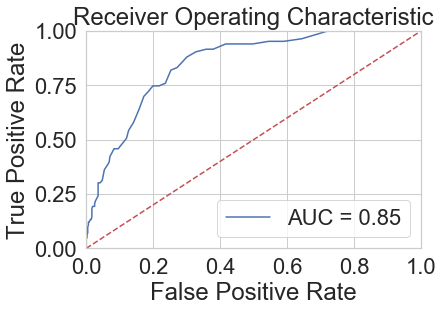

In [59]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc_base.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true_base, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
# RFC - Randomised Tuning (no PCA)

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

rfc_base_rdm = RandomForestClassifier(class_weight = {0:0.143, 1:0.857}) # 1937 0s and 324 1s
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs_base_rdm = RandomizedSearchCV(rfc_base_rdm, param_dist, n_iter = 100, cv = 5, verbose = 1, n_jobs=-1, random_state=0)

rs_base_rdm.fit(train_x, train_y)
rs_base_rdm.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}

In [61]:
rs_base_df = pd.DataFrame(rs_base_rdm.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_base_df = rs_base_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

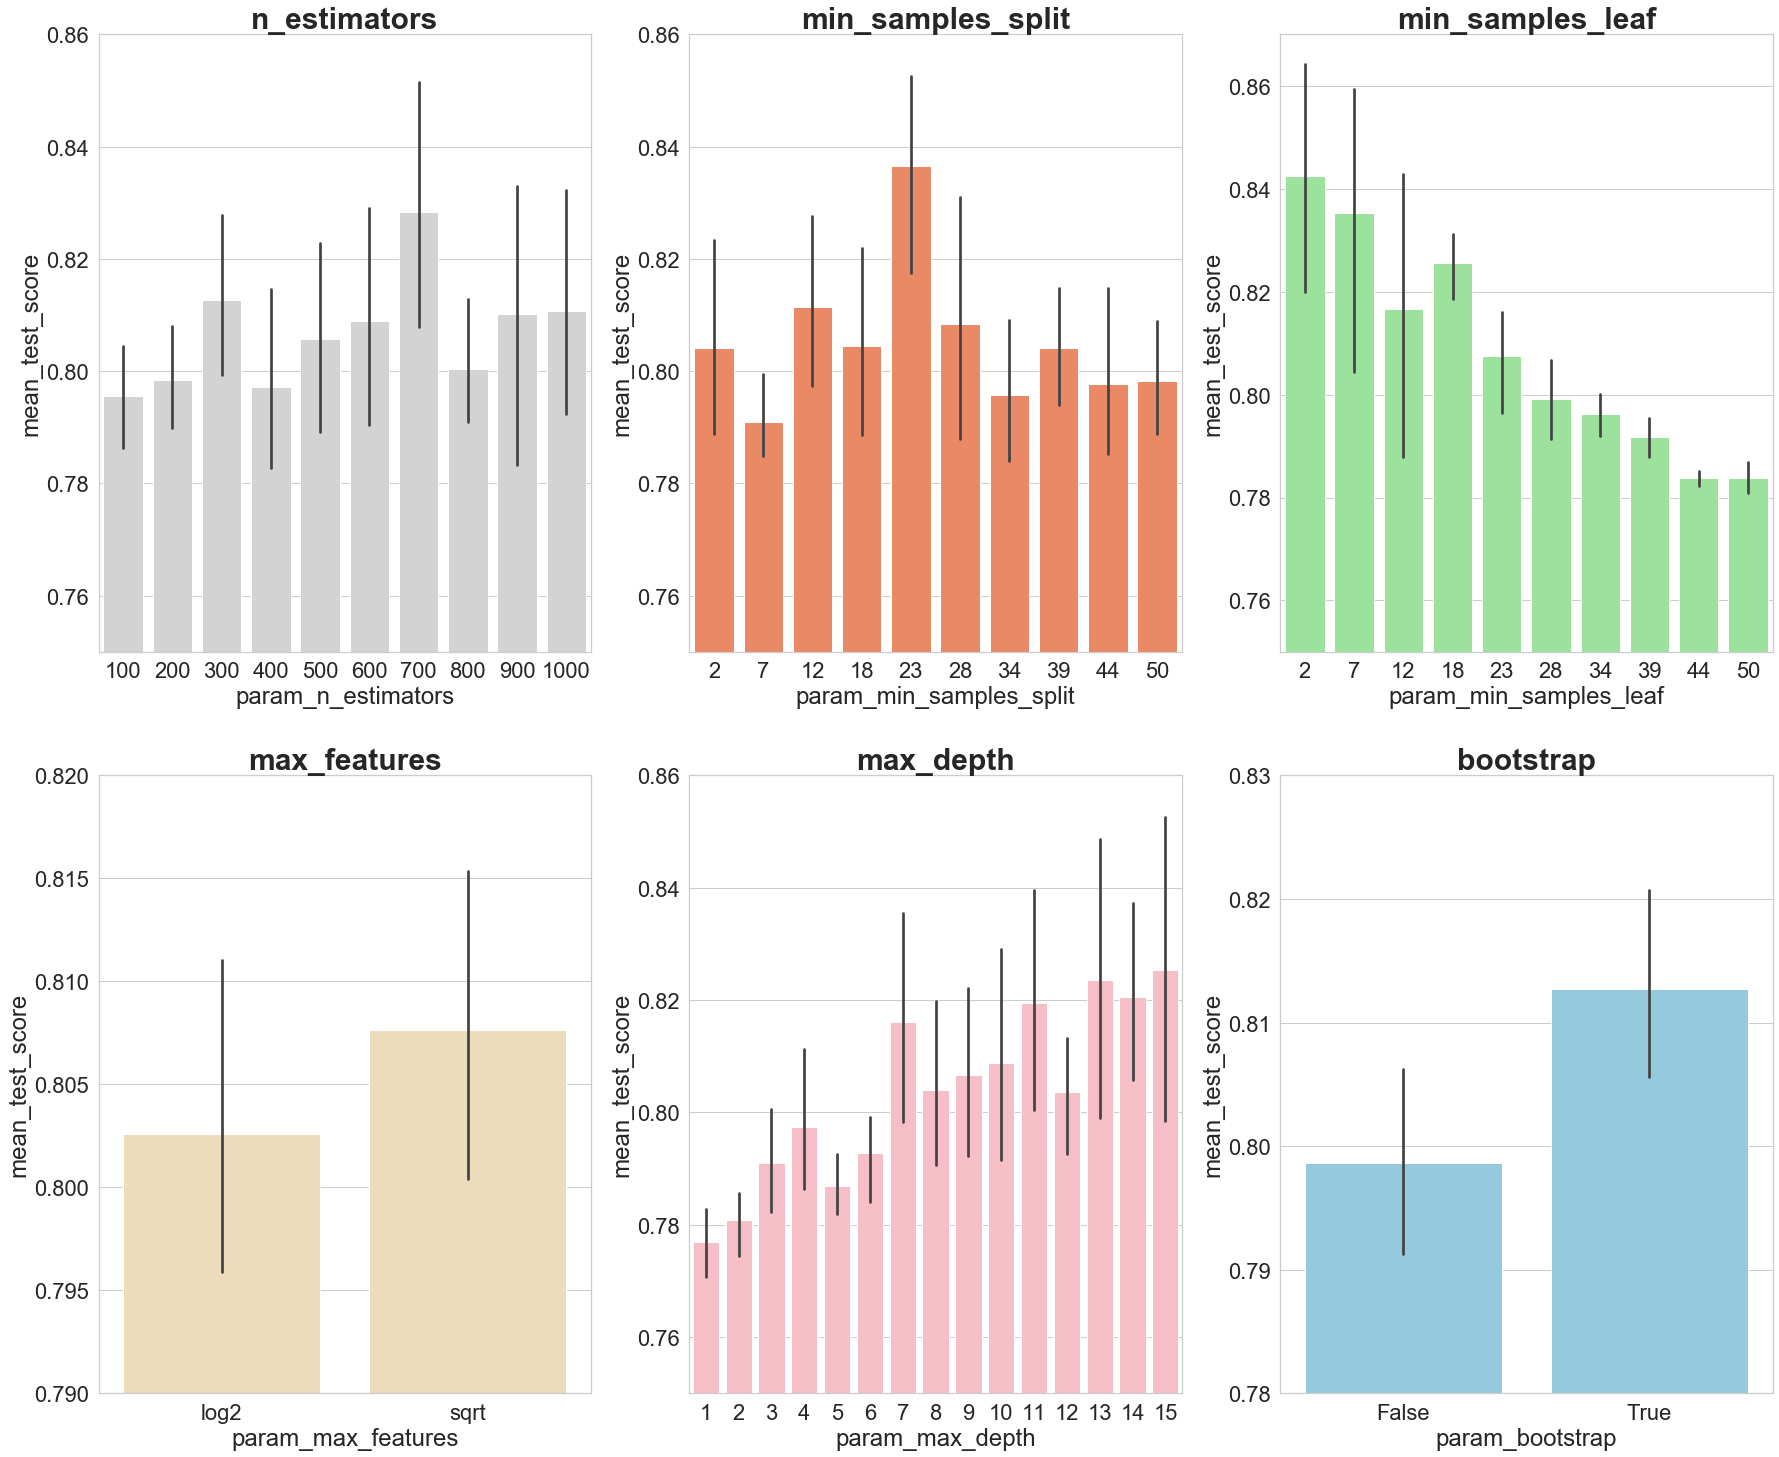

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_base_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.75,.86]),axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_base_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.75,.86]),axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_base_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.75,.87]),axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_base_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.79,.82]),axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_base_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.75,.86]),axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_base_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.78,.83])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [65]:
# RFC - GridSearch Tuning (no PCA)

from sklearn.model_selection import GridSearchCV

n_estimators = [700]
max_features = ['sqrt']
max_depth = [13,14,15]
min_samples_split = [22,23,24]
min_samples_leaf = [2,3,4]
bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc_base_gs = GridSearchCV(rfc_base_rdm, param_grid, cv = 5, verbose = 1, n_jobs=-1)
rfc_base_gs.fit(train_x, train_y)
rfc_base_gs.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.8min finished


{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 23,
 'n_estimators': 700}

In [66]:
y_true_base_gs, y_pred_base_gs = test_y, rfc_base_gs.best_estimator_.predict(test_x)

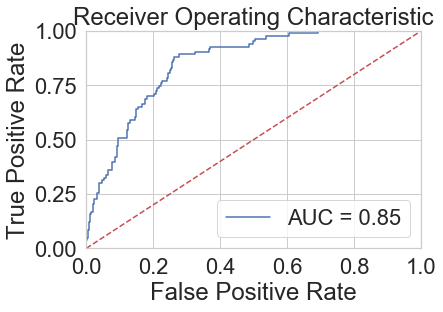

In [67]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc_base_gs.best_estimator_.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true_base_gs, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
# feature importance

# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.

# Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as 
# the sum over the number of splits (across all tress) that include the feature, 
# proportionally to the number of samples it splits.

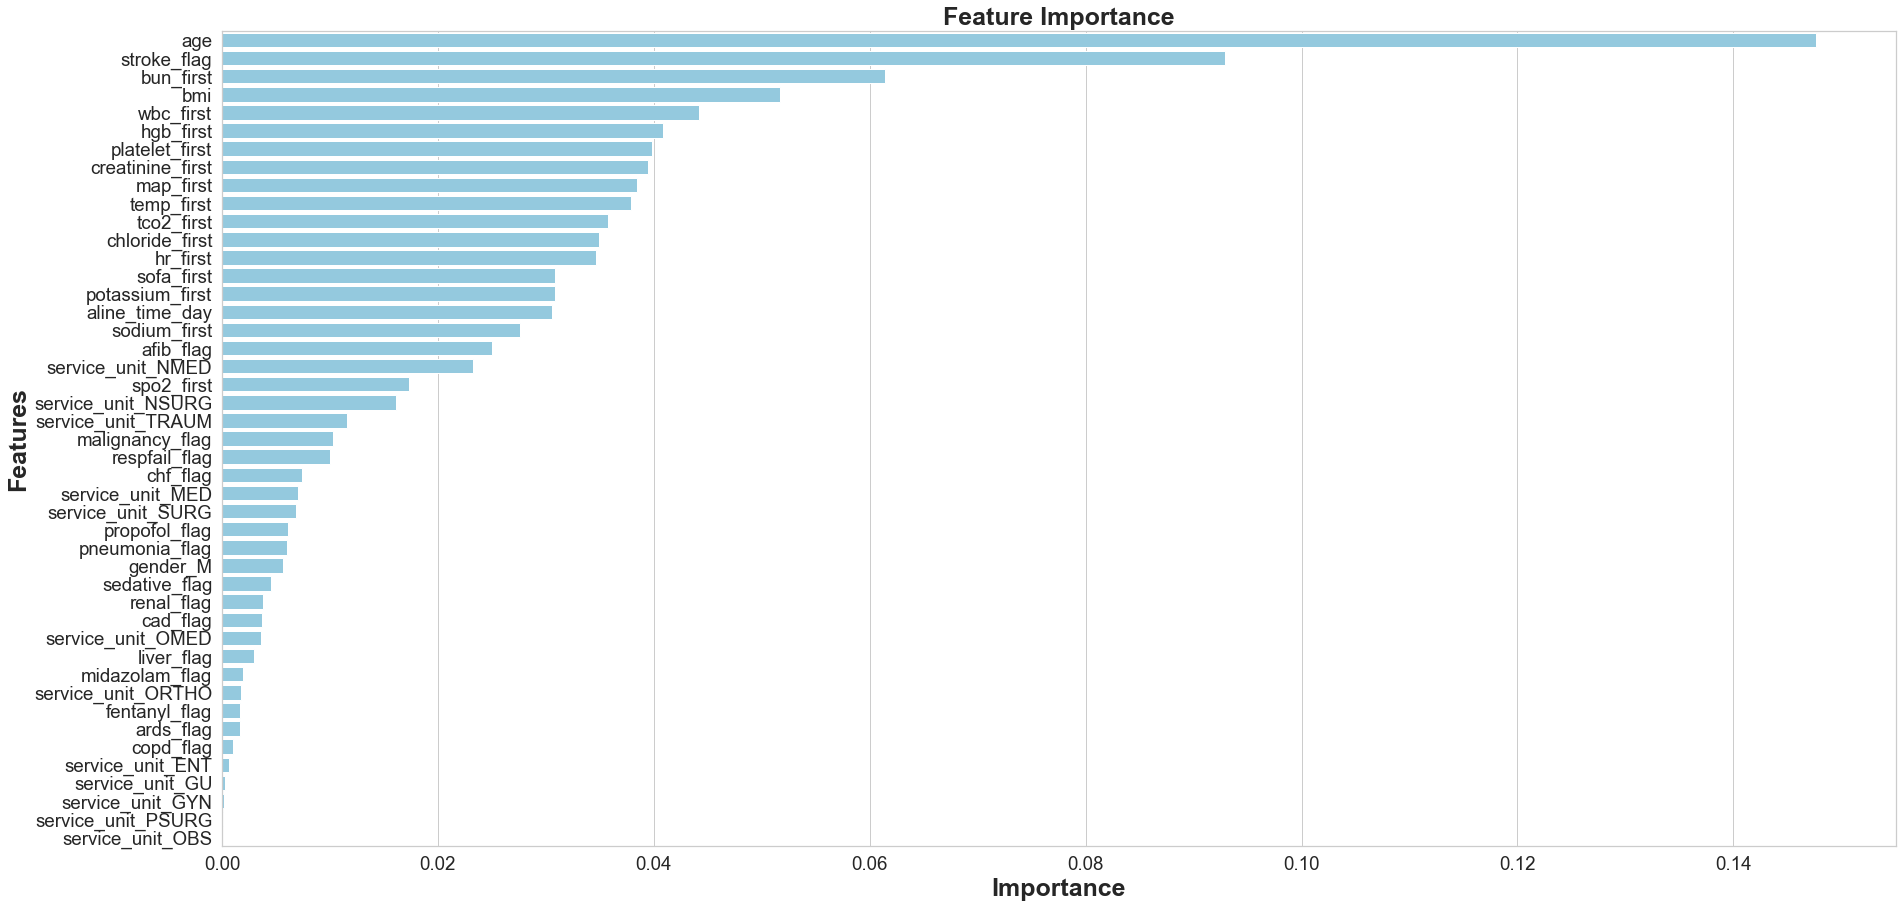

None

,Features,Gini-Importance
0,age,0.147679
1,stroke_flag,0.092926
2,bun_first,0.061461
3,bmi,0.051649
4,wbc_first,0.044157
5,hgb_first,0.040897
6,platelet_first,0.039825
7,creatinine_first,0.039453
8,map_first,0.038470
9,temp_first,0.037858


In [69]:
feats = {}
for feature, importance in zip(df_train_features.columns, rfc_base.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [70]:
from sklearn.decomposition import PCA

pca = PCA()
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

In [71]:
# checking for components/dimensions to cover 95% variance

explained_variance = pca.explained_variance_ratio_

def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

# Run function
select_n_components(explained_variance, 0.95)

28

In [72]:
# sanity check

import numpy as np
arr = np.array(explained_variance).tolist()
count = 0
for i in arr[0:select_n_components(explained_variance, 0.95)]:
    count += i
print (count)

print(explained_variance.size)

0.9500963495613172
45


In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=select_n_components(explained_variance, 0.95))
pca.fit(train_x)

train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [74]:
# Baseline RFC with class weights (PCA)

from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()
rfc_base_pca = RandomForestClassifier(class_weight = {0:0.143, 1:0.857}) # 1937 0s and 324 1s
rfc_base_pca.fit(train_x_pca, train_y)

y_true_pca, y_pred_pca = test_y , rfc_base_pca.predict(test_x_pca)

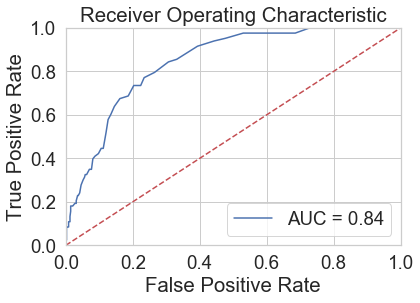

In [75]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc_base_pca.predict_proba(test_x_pca)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true_pca, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
# RFC - Randomised Tuning (PCA)

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

rfc_pca_rdm = RandomForestClassifier(class_weight = {0:0.143, 1:0.857}) # 1937 0s and 324 1s
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs_pca = RandomizedSearchCV(rfc_pca_rdm, param_dist, n_iter = 100, cv = 5, verbose = 1, n_jobs=-1, random_state=0)

rs_pca.fit(train_x_pca, train_y)
rs_pca.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.5min finished


{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}

In [77]:
rs_pca_df = pd.DataFrame(rs_pca.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_pca_df = rs_pca_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

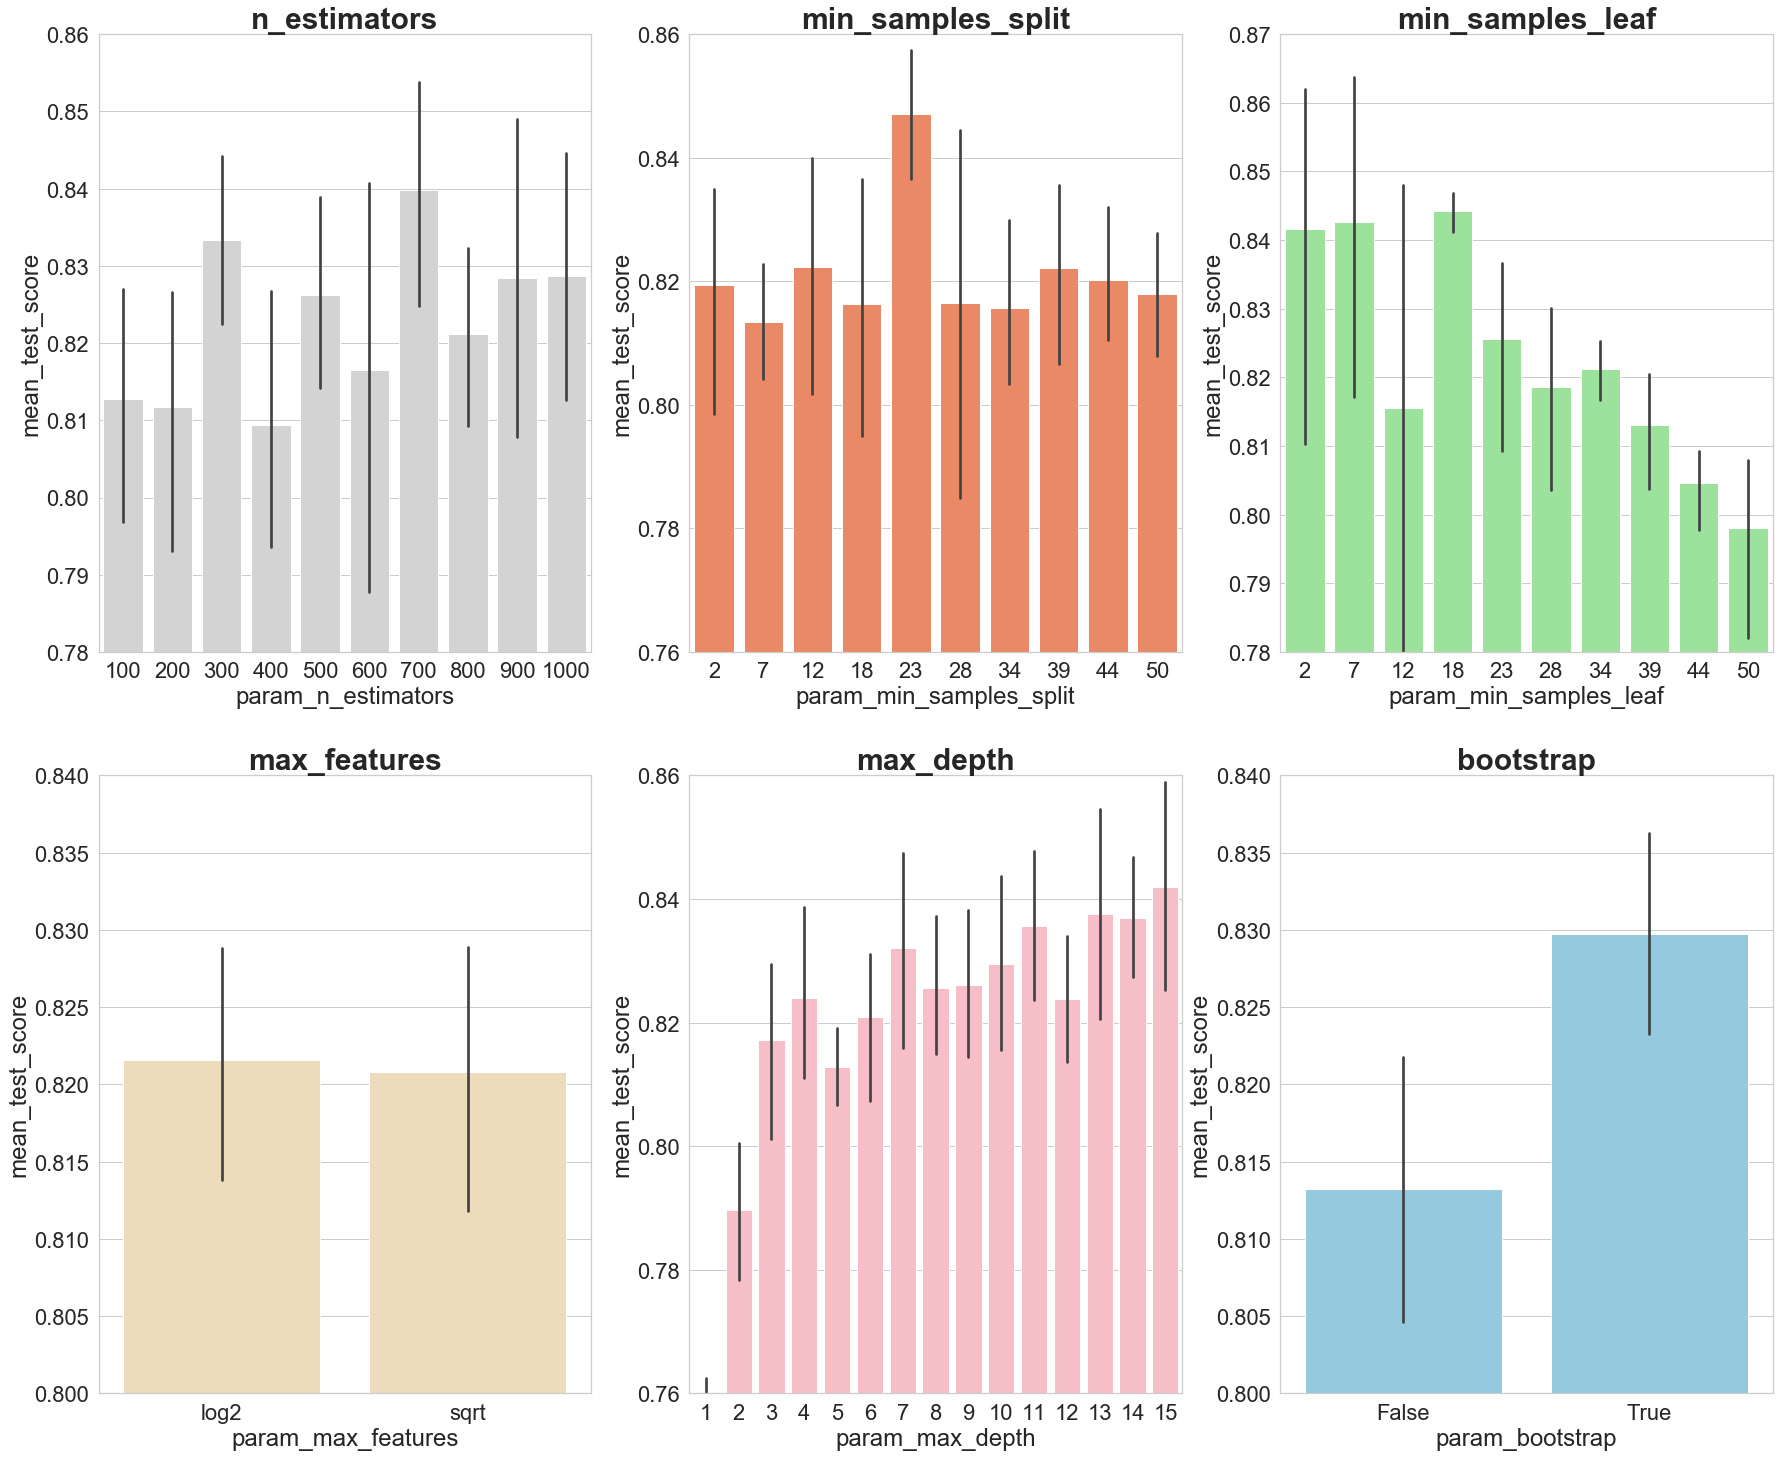

In [79]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_pca_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.78,.86]),axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_pca_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.76,.86]),axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_pca_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.78,.87]),axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_pca_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.80,.84]),axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_pca_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.76,.86]),axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_pca_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.80,.84])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [80]:
from sklearn.model_selection import GridSearchCV

n_estimators = [700]
max_features = ['log2','sqrt']
max_depth = [15]
min_samples_split = [22,23,24]
min_samples_leaf = [2,3,4,5,6,7,17,18,19]
bootstrap = [True]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc_pca_gs = GridSearchCV(rfc_pca_rdm, param_grid, cv = 5, verbose = 1, n_jobs=-1)

rfc_pca_gs.fit(train_x_pca, train_y)
rfc_pca_gs.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  5.1min finished


{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 23,
 'n_estimators': 700}

In [81]:
y_true_pca_gs, y_pred_pca_gs = test_y, rfc_pca_gs.best_estimator_.predict(test_x_pca)

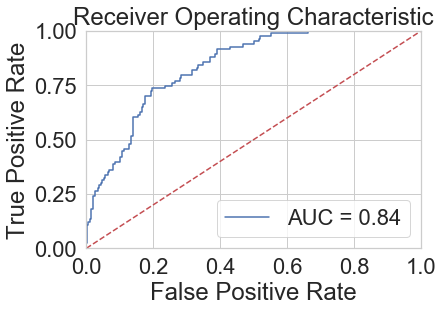

In [82]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
probs = rfc_pca_gs.best_estimator_.predict_proba(test_x_pca)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true_pca_gs, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# precision = true positive/(true positive + false positive)
# recall = true positive/(true positive + false negative)
# f1 score = 2 * (precision * recall)/(precision + recall)

conf_matrix_base = pd.DataFrame(confusion_matrix(y_true_base, y_pred_base), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_base_gs = pd.DataFrame(confusion_matrix(y_true_base_gs, y_pred_base_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_pca = pd.DataFrame(confusion_matrix(y_true_pca, y_pred_pca), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
conf_matrix_pca_gs = pd.DataFrame(confusion_matrix(y_true_pca_gs, y_pred_pca_gs), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_base)
display('Baseline RFC score', accuracy_score(y_true_base, y_pred_base))
print('Classification Report:') 
print(classification_report(y_true_base, y_pred_base))
display(conf_matrix_base_gs)
display('Tuned RFC score', accuracy_score(y_true_base_gs, y_pred_base_gs))
print('Classification Report:') 
print(classification_report(y_true_base_gs, y_pred_base_gs))
display(conf_matrix_pca)
display('Baseline PCA RFC score', accuracy_score(y_true_pca, y_pred_pca))
print('Classification Report:') 
print(classification_report(y_true_pca, y_pred_pca))
display(conf_matrix_pca_gs)
display('Tuned PCA RFC score', accuracy_score(y_true_pca_gs, y_pred_pca_gs))
print('Classification Report:') 
print(classification_report(y_true_pca_gs, y_pred_pca_gs))

,predicted 0,predicted 1
actual 0,475,8
actual 1,71,12


'Baseline RFC score'

0.8604240282685512

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       483
           1       0.60      0.14      0.23        83

    accuracy                           0.86       566
   macro avg       0.73      0.56      0.58       566
weighted avg       0.83      0.86      0.82       566



,predicted 0,predicted 1
actual 0,442,41
actual 1,50,33


'Tuned RFC score'

0.8392226148409894

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       483
           1       0.45      0.40      0.42        83

    accuracy                           0.84       566
   macro avg       0.67      0.66      0.66       566
weighted avg       0.83      0.84      0.84       566



,predicted 0,predicted 1
actual 0,476,7
actual 1,70,13


'Baseline PCA RFC score'

0.8639575971731449

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       483
           1       0.65      0.16      0.25        83

    accuracy                           0.86       566
   macro avg       0.76      0.57      0.59       566
weighted avg       0.84      0.86      0.83       566



,predicted 0,predicted 1
actual 0,455,28
actual 1,55,28


'Tuned PCA RFC score'

0.8533568904593639

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       483
           1       0.50      0.34      0.40        83

    accuracy                           0.85       566
   macro avg       0.70      0.64      0.66       566
weighted avg       0.83      0.85      0.84       566

